# 0.) Import and Clean data

In [1]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)

In [4]:
df = pd.read_csv('bank-additional-full (1).csv')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

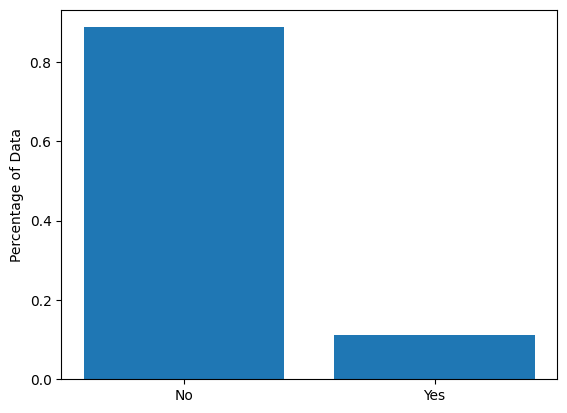

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
###############
###TRANSFORM###
###############

ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

X_scaled = over_X
y_train = over_y

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 249.5\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= 157.5\ngini = 0.381\nsamples = 24226\nvalue = [18034, 6192]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 0.5\ngini = 0.249\nsamples = 14390\nvalue = [12295, 2095]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.221\nsamples = 13940\nvalue = [12173, 1767]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.395\nsamples = 450\nvalue = [122, 328]\nclass = Yes'),
 Text(0.375, 0.375, 'month_may <= 0.5\ngini = 0.486\nsamples = 9836\nvalue = [5739, 4097]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 7257\nvalue = [3502, 3755]\nclass = Yes'),
 Text(0.4375, 0.125, 'gini = 0.23\nsamples = 2579\nvalue = [2237, 342]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 524.5\ngini = 0.403\nsamples = 26934\nvalue = [7546, 19388]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.5\ngini = 0.482\nsamples = 14304\nvalue = [5807, 8497]\nclass = Yes'),
 T

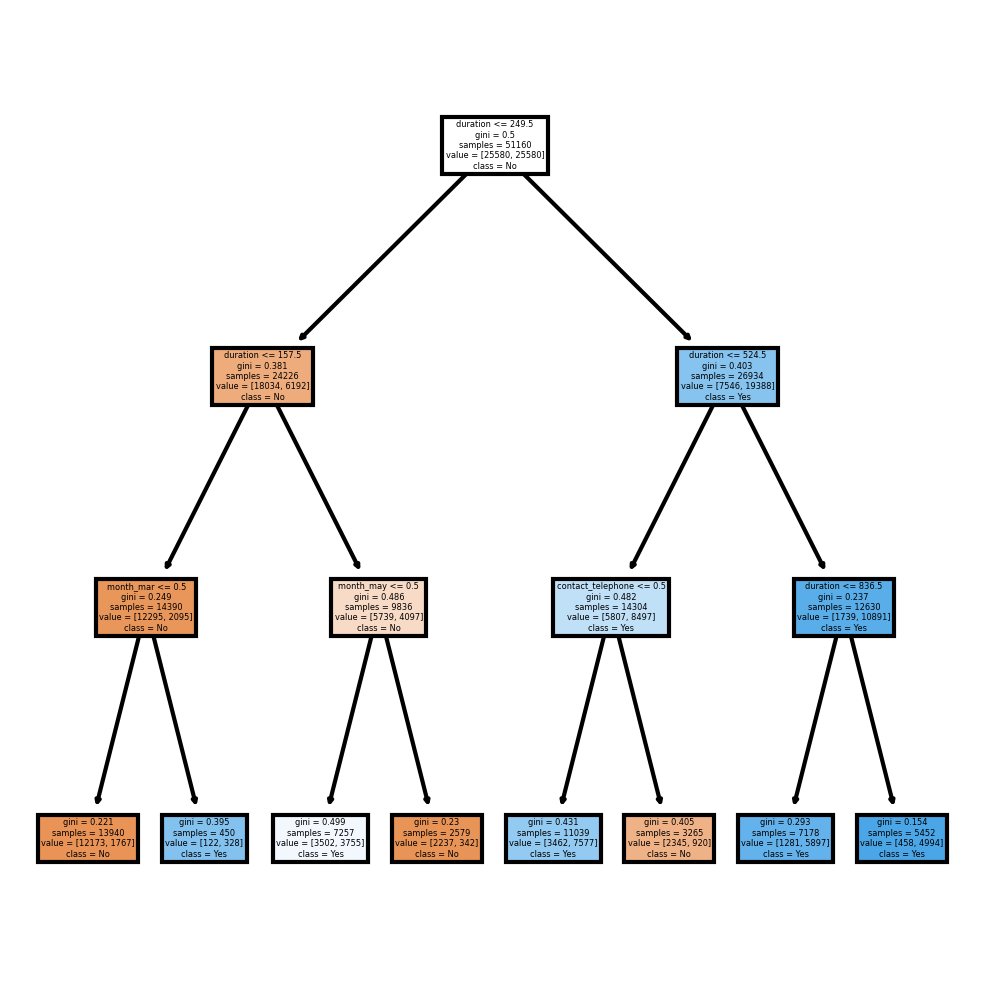

In [13]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

c:\UCLA\MQE\Fall 2023\Venv\py310\.conda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


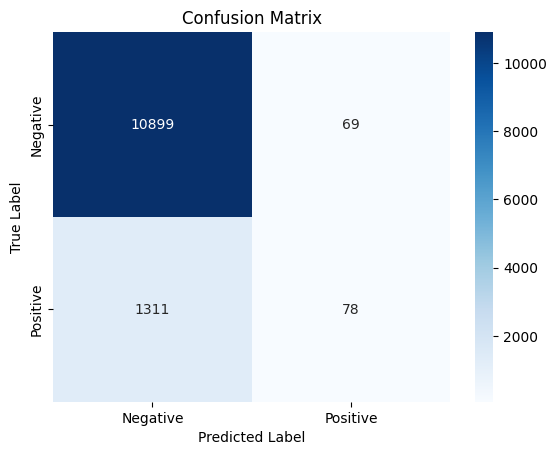

In [15]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [16]:
dtree_bag = DecisionTreeClassifier(max_depth=3)

In [17]:
bagging=BaggingClassifier(estimator= dtree_bag,
                  n_estimators=100,
                  max_samples= .5,
                  max_features=1.)
bagging.fit(X_scaled, y_train)
y_pred=bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

c:\UCLA\MQE\Fall 2023\Venv\py310\.conda\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\UCLA\MQE\Fall 2023\Venv\py310\.conda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


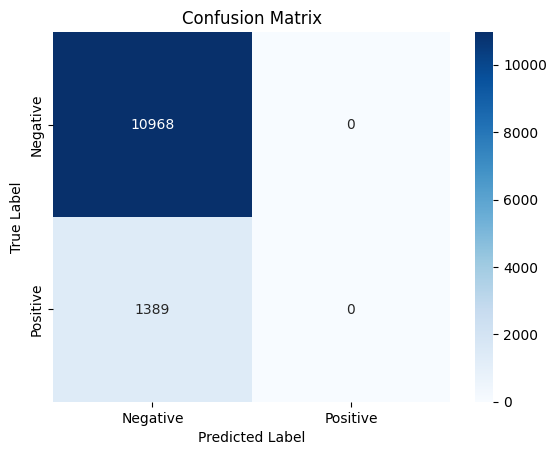

In [18]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [19]:
dtree_bst=DecisionTreeClassifier(max_depth=3)

In [20]:
boost=AdaBoostClassifier(estimator= dtree_bst,
                  n_estimators=50)
boost.fit(X_scaled, y_train)
y_pred=bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

c:\UCLA\MQE\Fall 2023\Venv\py310\.conda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\UCLA\MQE\Fall 2023\Venv\py310\.conda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


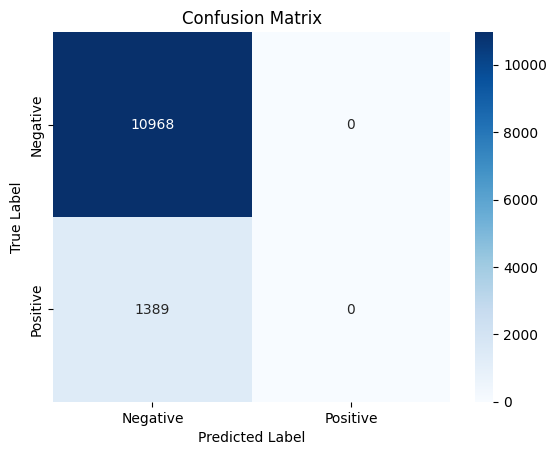

In [21]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [22]:
X_base_learners=[list(bagging.predict(X_scaled)),list(boost.predict(X_scaled)),list(dtree.predict(X_scaled))]

In [23]:
super_learner=LogisticRegression()

In [24]:
super_learner.fit(np.column_stack(X_base_learners), y_train)

c:\UCLA\MQE\Fall 2023\Venv\py310\.conda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
super_learner.fit(np.column_stack(X_base_learners), y_train)

c:\UCLA\MQE\Fall 2023\Venv\py310\.conda\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [26]:
super_learner.coef_

array([[0.32951073, 2.94017584, 0.82478338]])

 since the bagging model is 2.94, so it shoud be given the highest weight compared with two others. And the decision tree (0.32) should be given the least weight.